In [1]:
# Validation

In [2]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt 

# data20 = pd.read_csv('experimental_data.csv')
# best_fit = pd.read_csv('model_pellets_out.csv')
# plt.plot(data20['Time1'], data20['P_1'], 'v', color='k', label = 'experimental results')
# plt.plot(best_fit['time'], best_fit['inlet-p'], '.', color='C1', label = 'best fit')
# plt.xlabel('time (s)', fontsize = 12)
# plt.xlim(0,435)
# plt.ylim(0, 8000000) 
# plt.ylabel('pressure (Pa)', fontsize = 12)
# plt.tick_params(axis='both', which='major', labelsize=12) 
# plt.legend(fontsize = 12) 
# plt.grid()

In [3]:
import numpy as np
import pandas as pd
from itertools import permutations
import csv 
import numpy as np
 
start_value1= 2e-04
end_value1 = 4e-04


# Define the step size for the range
array = np.linspace(start_value1, end_value1, 11)


csv_file = 'parameters.csv'

with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['particle_diameter_1'])
    writer.writerows(zip(array))

/var/folders/nf/tk1_dsm923q946nd2xz6z6g0nv_859/T/ipykernel_83785/2873362328.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab20', len(data_frames))


[1.39293182 0.87342622 0.52371506 0.34969903 0.36867465 0.47876119
 0.59825793 0.70637482 0.80028039 0.8811263  0.95078117]


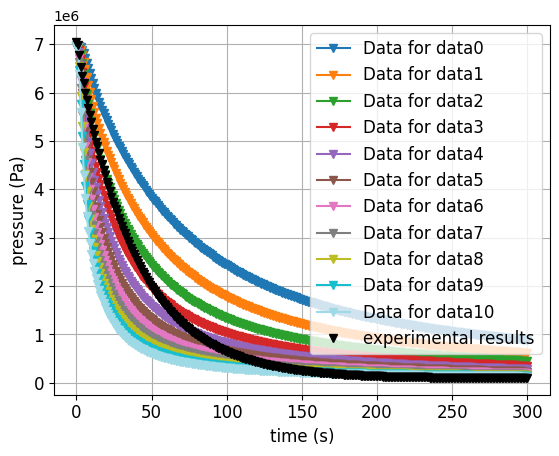

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create an empty dictionary to store the DataFrame 
data_frames = {}
RMSE = np.array([])
data20 = pd.read_csv('experimental_data.csv')

# Loop through numbers
for i in range(0, 11):
    filename = f'stochastic_tools_out_runner{i:02d}.csv' 
    data_frames[f'data{i}'] = pd.read_csv(filename)

# Function to compute Absolute Root Mean Square Error (ARMSE)
def compute_rmse(y_values, experimental_y_values):
    absolute_error = np.abs(y_values - experimental_y_values)
    squared_error = absolute_error**2
    mean_squared_error = np.mean(squared_error)
    rmse = np.sqrt(mean_squared_error)
    return rmse

color_palette = plt.cm.get_cmap('tab20', len(data_frames))

# Plot the data for each DataFrame with different line colors
for idx, (key, df) in enumerate(data_frames.items()):
    plt.plot(df['time'], df['inlet-p'], color=color_palette(idx), marker = 'v', label=f'Data for {key}', linestyle='-')
    # Compute the error between the plot and experimental data
    x_values = df['time']
    y_values = df['inlet-p']
    experimental_y_values = np.interp(x_values, data20['Time1'], data20['P_1'])
    range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
    rmse = compute_rmse(y_values, experimental_y_values)/1e6 
    # Append the value to the NumPy array
    RMSE = np.append(RMSE, rmse) 


print(RMSE)


plt.plot(data20['Time1'], data20['P_1'], 'v', color='k', label = 'experimental results')
plt.xlabel('time (s)', fontsize = 12)
# plt.xlim(0,45)
# plt.ylim(0, 7500000)
plt.ylabel('pressure (Pa)', fontsize = 12)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.legend(fontsize = 12)
plt.grid()


minimum RMSE position:  3
minimum particle_diameter:  0.00026


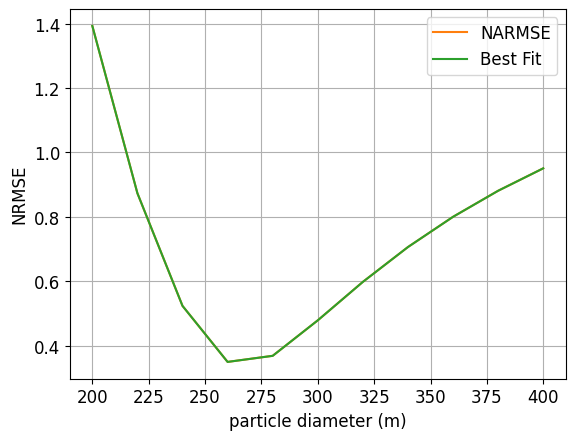

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

particle_diameter_1 = pd.read_csv('parameters.csv')*1e6

degree = 9# Degree of the polynomial
coefficients = np.polyfit(particle_diameter_1['particle_diameter_1'], RMSE, degree)
poly_function = np.poly1d(coefficients)
y_fit = poly_function(particle_diameter_1['particle_diameter_1'])

plt.plot(particle_diameter_1['particle_diameter_1'], RMSE, color='C1', label = 'NARMSE')
plt.plot(particle_diameter_1['particle_diameter_1'], y_fit, color='C2', label = 'Best Fit')
plt.xlabel('particle diameter (m)', fontsize = 12)
plt.ylabel('NRMSE', fontsize = 12)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.legend(fontsize = 12)
plt.grid()

index = np.argmin(RMSE, axis = 0)
print(f"minimum RMSE position: ", index)
particle_diameter = pd.read_csv('parameters.csv')
min_particle_diameter = particle_diameter.iloc[index, 0]
print(f"minimum particle_diameter: ", min_particle_diameter)

# # compute error:
# Dp_error = (end_value1-start_value1)/100
# print(Dp_error)
# k_error = abs(2*min_particle_diameter*(0.018**3)/(1-0.018)**2*Dp_error)
# print(k_error)
 
